## Prueba #0307

### "ANOVA para el crecimiento de los dientes en las cobayas"

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Responda las siguientes preguntas proporcionando código Python:

Utilizar el conjunto de datos "data_ToothGrowth.csv". Los atributos de este dataset son los siguientes:
- len = longitud de los dientes.
- sup = tipo suplementario con dos valores posibles: VC (vitamina C) o OJ (zumo de naranja).
- dosis (mgr / día) = dosis por día con tres valores posibles: 0,5, 1,0, 2,0.

In [2]:
# Ir al directorio que contiene al fichero. 
# os.chdir(r'~~')                # Descomentar y reemplazar
                                 # por la ruta adecuada si el fichero no esta en el mismo directorio.

In [3]:
df = pd.read_csv('data_ToothGrowth.csv', header='infer')

In [4]:
df.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


1) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'supp' para determinar si las varianzas de las longitudes de los dientes entre las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [5]:
# Las categorias de supp son VC y OJ
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

In [6]:
# Agrupar por categoría.
x_vc = df[df.supp=='VC'].len
x_oj = df[df.supp=='OJ'].len

In [7]:
# ANOVA.
res=st.f_oneway(x_oj,x_vc)
print("p-valor: " + str(res[1]))

p-valor: 0.060393371224128745


In [8]:
# Comentario del resultado.

Con $\alpha =0.05$, **no hay** diferencia significativa en la varianza entre las categorías 'supp'.

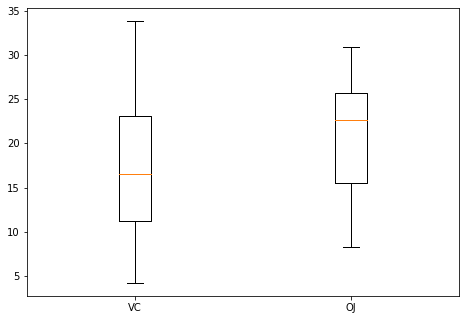

In [9]:
# Diagrama de cajas.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot([x_vc,x_oj],0)
ax.set_xticklabels(['VC','OJ'])
plt.show()

2) Realice el test ANOVA ($\alpha = 5\%$) con la variable 'dose' para determinar si las varianzas de las categorías son comparables. <br>
Comente el resultado y complete la explicación con un diagrama de cajas.

In [10]:
# Las categorías de 'dose' son 0.5, 1 y 2. 
df.dose.unique()

array([0.5, 1. , 2. ])

In [11]:
# Agrupar por categoría.
x_05 = df[df.dose==0.5].len
x_1 = df[df.dose==1.0].len
x_2 = df[df.dose==2.0].len

In [12]:
# ANOVA.
res=st.f_oneway(x_05,x_1,x_2)
print("p-valor: " + str(res[1]))

p-valor: 9.532727011699946e-16


In [13]:
# Comentario del resultado.

Con $\alpha =0.05$ y $\alpha = 0.01$, **hay** diferencia significativa en la varianza entre las categorías 'dose'. Por ello, hay evidencia estadística suficiente a favor de que las varianzas son distintas entre clases.

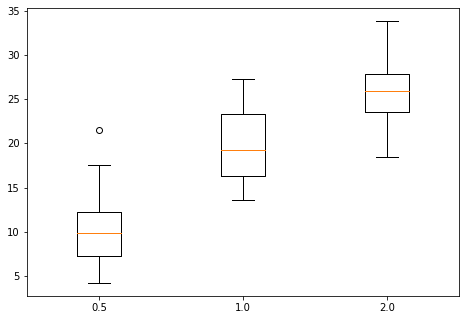

In [14]:
# Diagrama de cajas.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.boxplot([x_05,x_1,x_2],0)
ax.set_xticklabels(['0.5','1.0','2.0'])
plt.show()